In [70]:
import pandas as pd

df = pd.read_csv("../data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [71]:
# Ziel: ersetze NAs in object cols durch "unknown" und in numeric cols als -1

def replace_na(col):
    if isinstance(col, (int, float)):
        return col.fillna(-1)
    return col.fillna("unknown")
df = df.apply(replace_na)


In [73]:
from sklearn.preprocessing import OrdinalEncoder


target = "Engine Fuel Type"

enc = OrdinalEncoder()


X = enc.fit_transform(df.drop(target, axis=1).astype(str))
# X[np.isnan(X)] = -1

y = df[target]
# y.fillna("Unknown")

pd.DataFrame(X, columns= df.drop(target, axis=1).columns)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4.0,1.0,21.0,199.0,7.0,3.0,3.0,0.0,38.0,0.0,8.0,25.0,21.0,28.0,4814.0
1,4.0,0.0,21.0,175.0,7.0,3.0,3.0,0.0,67.0,0.0,6.0,27.0,21.0,28.0,4335.0
2,4.0,0.0,21.0,175.0,7.0,3.0,3.0,0.0,64.0,0.0,8.0,27.0,22.0,28.0,3843.0
3,4.0,0.0,21.0,119.0,7.0,3.0,3.0,0.0,67.0,0.0,8.0,27.0,20.0,28.0,2756.0
4,4.0,0.0,21.0,119.0,7.0,3.0,3.0,0.0,63.0,0.0,6.0,27.0,20.0,28.0,3582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0.0,901.0,22.0,175.0,7.0,1.0,0.0,2.0,13.0,2.0,2.0,22.0,18.0,17.0,4813.0
11910,0.0,901.0,22.0,175.0,7.0,1.0,0.0,2.0,13.0,2.0,2.0,22.0,18.0,17.0,5357.0
11911,0.0,901.0,22.0,175.0,7.0,1.0,0.0,2.0,13.0,2.0,2.0,22.0,18.0,17.0,5097.0
11912,0.0,901.0,23.0,175.0,7.0,1.0,0.0,2.0,13.0,2.0,2.0,22.0,18.0,17.0,5112.0


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=73)

model = DecisionTreeClassifier(max_depth=15)

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=15)

In [92]:
X_test[10]

array([3.300e+01, 5.950e+02, 2.700e+01, 1.630e+02, 7.000e+00, 1.000e+00,
       2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 2.600e+01,
       2.200e+01, 1.500e+01, 3.353e+03])

In [99]:
y_test.reset_index(drop=True)[10]

'regular unleaded'

In [93]:
model.predict([X_test[10]])

array(['regular unleaded'], dtype=object)

In [112]:
model.score(X_train, y_train)

0.9814290210890777

In [113]:
model.score(X_test, y_test)

0.9626521191775074

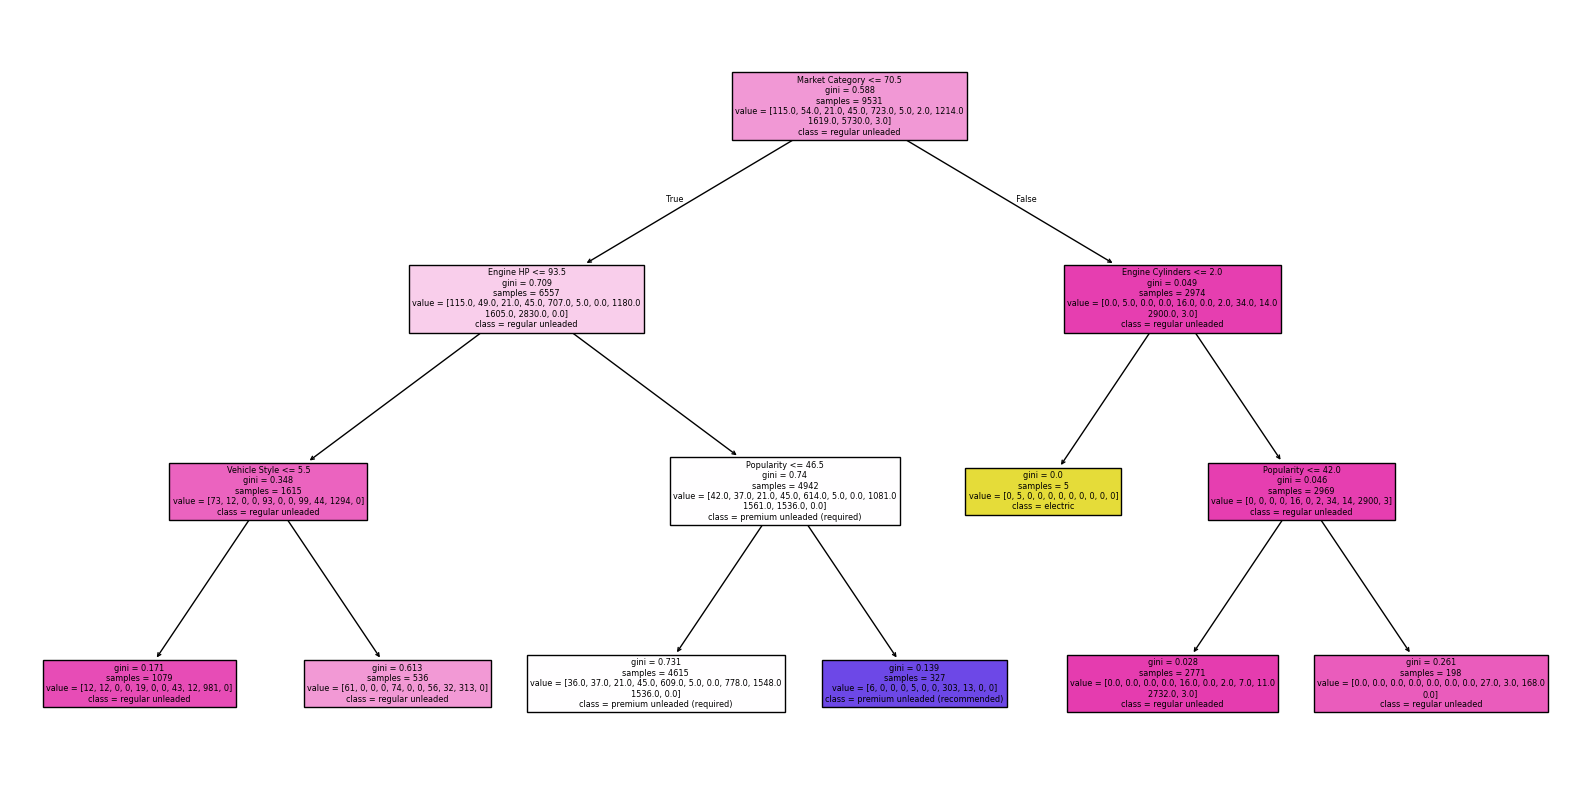

In [106]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=df.drop(target, axis=1).columns, class_names=model.classes_, filled=True)
plt.show()

In [120]:
import graphviz

tree_data = tree.export_graphviz(model, feature_names=df.drop(
    target, axis=1).columns, class_names=model.classes_, filled=True)

graph = graphviz.Source(tree_data)
graph.view()

'Source.gv.pdf'

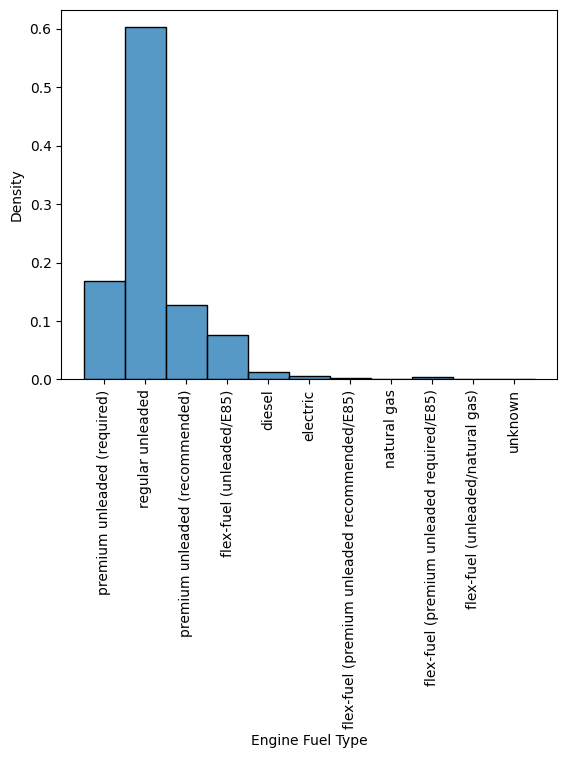

In [133]:
import seaborn as sns

sns.histplot(df, x="Engine Fuel Type", stat="density")
# plt.hist(df["Engine Fuel Type"], density=True)
plt.xticks(rotation=90);